# Chapter 2: Simple Linear Regression 📈

## Learning Objectives 🎯
By the end of this chapter, you will be able to:
- Understand what Simple Linear Regression is and when to use it
- Build your first predictive model using real data
- Evaluate how well your model performs using different metrics

Welcome to the exciting world of predictive modeling! In this chapter, we'll learn how to predict one variable using another variable through Simple Linear Regression. This is one of the most fundamental and practical tools in data science, used in everything from business forecasting to scientific research.

In [1]:
%reset
low_memory=False
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns; sns.set()
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Nothing done.


## 2.1 Introduction & Motivation

### What is Supervised Learning? 🤔

Remember how you learned to solve math problems by looking at examples? Supervised Learning works the same way! Let's break it down:

#### Key Concepts 📚
- **Supervised Learning**: Teaching a computer by showing it examples
  - Like learning to cook by following recipes
  - Or learning a language by seeing translations
- **Variables in Our Analysis**:
  - **Dependent variable (y)**: What we want to predict
    - Examples: 📊 Final exam score, 🏠 House price, 💰 Monthly sales
  - **Independent variable (x)**: What we use to make the prediction
    - Examples: 📚 Study hours, 🏗️ House size, 📢 Marketing budget

### Why Simple Linear Regression? 📊

We use Simple Linear Regression in situations where:

1. **Variables are Continuous** (can take any value in a range)
   - Temperature: 20.5°C, 20.6°C, 20.7°C...
   - Height: 165.2cm, 165.3cm, 165.4cm...
   - Salary: $45,678.90, $45,678.91...

2. **Relationship Looks Linear** (follows a straight-line pattern)
   - More study time ➡️ Better test scores
   - Bigger house ➡️ Higher price
   - More exercise ➡️ More calories burned

#### Real-World Applications 🌍
- **Education**: Predicting exam scores based on study hours
- **Business**: Forecasting sales based on advertising spend
- **Sports**: Estimating running speed based on training hours
- **Health**: Predicting weight loss based on exercise minutes

## 2.2 Problem Setting

Let's understand what Simple Linear Regression actually looks for in data. Imagine you're trying to:
- Predict a student's test score based on their study hours
- Estimate house prices based on their size
- Forecast ice cream sales based on temperature

In all these cases, we're looking for a **linear pattern** - when one value goes up, does the other value go up (or down) in a consistent way?

Let's look at some example data to understand this better:

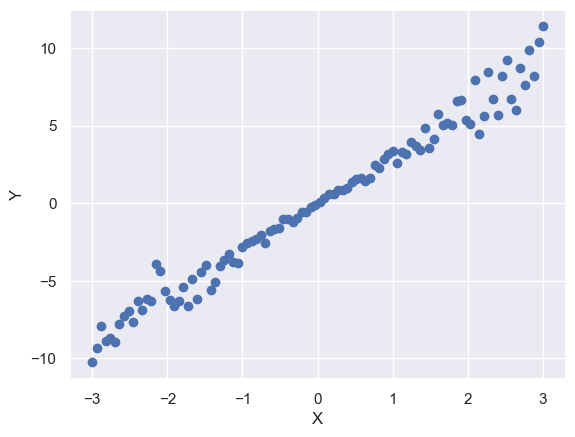

In [2]:
# Creating  the dataset
n_obs = 100
x = np.linspace(-3, 3, n_obs)
X = x[:, np.newaxis]
y = x + x*np.random.normal(2,.5,n_obs)

# Plot our data
plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 🔍 What Can We See in This Data?

Looking at the scatter plot above, we can make some important observations:

1. **Direction**: As x increases, y tends to increase too (positive relationship)
2. **Consistency**: The relationship looks fairly steady - there's a clear pattern
3. **Predictability**: If we know x, we can make a reasonable guess about y
4. **Pattern**: The points seem to follow a straight line pattern

### 💡 The Key Insight

Ask yourself: "If I had to draw ONE straight line through these points to best represent the pattern, what would it look like?"

This is exactly what Simple Linear Regression does - it finds the best straight line that represents our data. This line will help us make predictions!

## 2.3 Model

### 2.3.1 Model

### 📐 The Simple Linear Regression Formula

Let's make the math friendly! The formula for our prediction line is:

$$y = \beta_0 + \beta_1 x $$

#### Breaking It Down with a Real Example: Predicting Ice Cream Sales 🍦

Imagine you're running an ice cream shop and want to predict daily sales based on temperature:

- **y** = Daily ice cream sales (in €)
- **x** = Temperature (in °C)
- **β₀** (Beta 0) = Base sales (sales when temperature is 0°C)
- **β₁** (Beta 1) = Sales increase per degree (how much sales go up when temperature rises by 1°C)

For example, if:
- β₀ = 50 (you sell €50 worth of ice cream at 0°C)
- β₁ = 10 (sales increase by €10 for each degree increase)

Then at 25°C, your predicted sales would be:
- y = 50 + 10 × 25
- y = 50 + 250
- y = €300

### 🎯 Finding the Best Line

Think of this like playing a video game where you need to:
1. Draw a line through your data points
2. Measure how far each point is from your line
3. Try to get the smallest total distance possible

The computer does this automatically using the **Ordinary Least Squares (OLS) Algorithm**. It's like having a super-smart assistant that tries thousands of lines until it finds the very best one!

### 2.3.2 Model Estimation

To implement this algorithm, luckily Python gives us a hand. Let's first make a function object:

In [3]:
regressor = LinearRegression()

Yes, it really is as simple as that. Now we've made our Linear Regression object, let's run the OLS algorithm in order to fit the function on our data:

In [4]:
regressor.fit(X, y)

LinearRegression()

And just like that, we've fitted our very first model! 

Now, of course, simply by saying that our model has been run, doesn't magically allow us to predict values for y. Let's take a look at which function we have produced:


In [5]:
print("Intercept (Beta 0): {}".format(regressor.intercept_))
print("Slope (Beta 1): {}".format(regressor.coef_[0]))

Intercept (Beta 0): -0.0029833672808122847
Slope (Beta 1): 3.032531040588029


We can use this information to predict values of y!

##### Question 1: Predict the values for y when x is -2, pi, and 0. 

In [6]:
regressor.coef_[0] * 3.14 + regressor.intercept_

9.519164100165598

Next to predicting values, it might also be interesting to have a graphical representation:

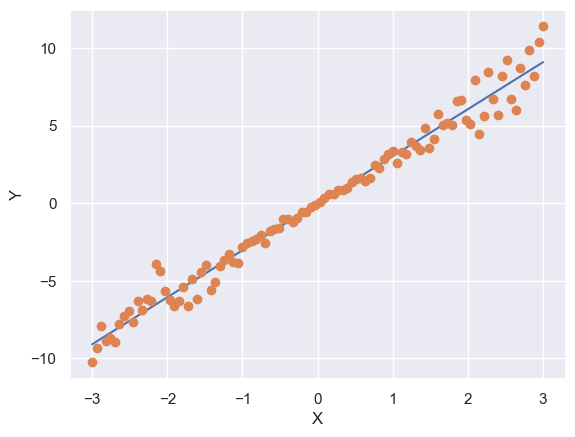

In [15]:
min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
max_pt = X.max() * regressor.coef_[0] + regressor.intercept_
plt.plot([X.min(), X.max()], [min_pt, max_pt])
plt.plot(X, y, 'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 2.4 Model Evaluation

Based on the graph we've produced above, it is abundandly clear that our model is fairly good. However, that might not be convincing for everyone. Next to that, in other cases it might maybe not be so clear. As such, we need certain metrics to assess just how good our model exactly is. 

Luckily, scikit-learn helps us here as well. There are 2 main criteria for regression evaluation: The $R^2$ score and the $MSE$.

### 2.4.1 Variational Measure ($R^2$)

### Understanding R² (R-squared) 🎯

Think of R² as a grade for your model's performance, but on a scale from 0% to 100%!

#### 📊 What R² Tells Us
- R² = 0% → Your model is just guessing
- R² = 50% → Your model is doing okay, but missing half the story
- R² = 90% → Your model is doing great!
- R² = 100% → Perfect predictions (very rare in real life!)

#### 🏠 Real Estate Example
Imagine you're predicting house prices using just the house size:
- R² = 75% means:
  - 75% of price differences can be explained by size differences
  - 25% might be due to other factors like:
    - 📍 Location
    - 🏗️ Age of the house
    - 🛠️ Renovations
    - 🏊‍♂️ Special features (pool, garage, etc.)

#### 💡 Key Takeaway
A higher R² means your model is better at making predictions, but even a lower R² can be useful depending on your needs!

In [8]:
print('The R2 score of the model on the test set is:', regressor.score(X, y))

The R2 score of the model on the test set is: 0.9773320685440519


##### Question 2: Interpret the $R^2$ score. Is our model any good?

### 2.4.2 Mean Absolute Error

### Understanding MAE (Mean Absolute Error) 📏

MAE is like measuring the average size of our prediction mistakes. It's super practical because it's in the same units as what we're predicting!

#### 🎯 The Formula
$$ MAE = \frac{1}{n}\sum_{i=1}^n|\text{predicted}_i-\text{true}_i|$$

#### 🏠 Real Estate Example
If you're predicting house prices and your MAE is €20,000:
- Some predictions might be off by €30,000
- Others might be off by €10,000
- But on average, you're off by €20,000

#### 🎓 Student Grade Example
If predicting test scores (0-100) with MAE = 5:
- Your predictions are off by 5 points on average
- A predicted 85 might actually be between 80-90
- Very useful for setting confidence intervals!

#### 💡 Key Takeaway
The smaller your MAE, the better your predictions. It's easy to explain to others because it's in the same units as your predictions!

In [9]:
y_pred = regressor.predict(X).reshape(-1, 1)
print('The MAE of the model on the test set is:', mean_absolute_error(y_pred, y))

The MAE of the model on the test set is: 0.5777089032123723


### 2.4.3 Mean Squared Error

### Understanding MSE (Mean Squared Error) 🎯

MSE is like MAE's stricter cousin - it's tougher on big mistakes! 

#### 📐 The Formula
$$MSE = \frac{1}{n} \sum^{n}_{i=1} (\text{predicted}_i - \text{true}_i)^2$$

#### 🤔 Why Square the Errors?
Imagine you're predicting house prices:
- Small mistake: Off by €1,000 → Contributes 1,000² = 1,000,000 to MSE
- Big mistake: Off by €10,000 → Contributes 10,000² = 100,000,000 to MSE

#### 🎓 Student Grade Example
Predicting test scores (0-100):
1. Small errors:
   - Predicted 85, Actual 87 → Error = 2² = 4
   - Predicted 92, Actual 90 → Error = 2² = 4
2. Big error:
   - Predicted 70, Actual 90 → Error = 20² = 400 (Ouch!)

#### 💡 Key Takeaway
MSE is especially useful when:
- Big mistakes are much worse than small ones
- You want your model to be really careful about making big errors
- You're comparing different models (lower MSE = better model)

In [10]:
print('The MSE of the model on the test set is:', mean_squared_error(y_pred, y))

The MSE of the model on the test set is: 0.6528113330222236


## 2.5 Exercises

##### Question 1: See section 2.3.2
##### Question 2: See section 2.4.1
##### Question 3: In section 2.3.2 we draw the function line by executing the function at the minimum value of X and the maximum value of X. Adapt the function coefficients and report what happens. What happens if Beta 1 is positive? What happends if it is negative? What happens to the function if Beta 1 is equal to 0?
##### Question 4: Think of examples in which linear regression will definitely **not** be the way to go. Give 3.